## Agenda

1. Titanic EDA
2. Students Performance

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#Plotly Libraris
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots

# Make Plotly work in your Jupyter Notebook
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

from warnings import filterwarnings
filterwarnings("ignore")

## Titanic

In [2]:
df = pd.read_csv("../data/titanic.csv")
df['died'] = 1 - df['survived']
print(df.shape)
df.head(2)

(891, 16)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,died
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0


### EDA

In [3]:
df.describe()

,survived,pclass,age,sibsp,parch,fare,died
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.616162
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [4]:
df.dtypes

survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
died             int64
dtype: object

In [5]:
#women survival 
women = df[df["sex"] == 'female']["survived"]
#men survival 
men = df[df["sex"] == 'male']["survived"]
print("Survival rate for women is {:.2f} and for men is {:.2f}".format((sum(women)/len(women))*100, (sum(men)/len(men))*100))

Survival rate for women is 74.20 and for men is 18.89


In [6]:
# Gender and no. of Passangers
fig = go.Figure(data=[
    go.Bar(name='Survived',
           x=df['sex'],
           y=[df[df.sex=='male']['survived'].agg(sum),
              df[df.sex=='female']['survived'].agg(sum)],
           marker_color='#EB89B5',
           opacity=0.75),
    go.Bar(name='Died',
           x=df['sex'],
           y=[df[df.sex=='male']['died'].agg(sum),
              df[df.sex=='female']['died'].agg(sum)],
           marker_color='#330C73',
           opacity=0.75)
])
fig.update_layout(barmode='stack', width=600, title_text='Survivors categorized as Male/Female', xaxis_title_text='Sex', yaxis_title_text='Number of passangers')
fig.show()

In [7]:
# Survival based on Fare, Embarked and Pclass
facet_data = df[['sex', 'survived', 'embarked', 'pclass', 'fare']].groupby(['sex', 'survived', 'embarked', 'pclass']).agg('sum').reset_index()
fig  = px.bar(facet_data, x='sex', y='fare', facet_row='survived', facet_col='pclass', color='embarked', barmode='group')
fig.update_layout(title_text='Different view of Passenger survival with respect to Fare, Embarked and Pclass')
fig.show()

In [8]:
# survival by age of passangers
fig = go.Figure()
fig.add_trace(go.Violin(x=df['sex'][df['survived']==1], y=df['age'][df['survived']==1],
                         name='survived', side='negative', legendgroup='survived', scalegroup='survived', line_color='blue'))
fig.add_trace(go.Violin(x=df['sex'][df['died']==1], y=df['age'][df['died']==1],
                         name='died', side='positive', legendgroup='died', scalegroup='died', line_color='dark orange'))
fig.update_traces(meanline_visible=True, width=1)
fig.update_layout(violingap=0, violinmode='overlay', width=700, title_text='survivors categorized as Male/Female related to their age', xaxis_title_text='sex', yaxis_title_text='age of passangers')
fig.show()

In [9]:
# survival by fare
fig_hist = go.Figure()
fig_hist.add_trace(go.Histogram(x=df[df['survived']==1]['fare'], name='survived', marker_color='#EB89B5', opacity=0.75))
fig_hist.add_trace(go.Histogram(x=df[df['died']==1]['fare'], name='died', marker_color='#330C73', opacity=0.75))
fig_hist.update_layout(barmode='stack', title_text='Histogram representing relation between survivor/dead with fare',
                       xaxis_title_text='fare', yaxis_title_text='Number of Passangers', bargap=0.2)
fig_hist.show()

In [10]:
# survival by age and fare
fig_scatter_plane = go.Figure()
fig_scatter_plane.add_trace(go.Scatter(x=df[df['survived']==1]['age'], y=df[df['survived']==1]['fare'],
                                       mode='markers', name='survived', marker=dict(size=df[df['survived']==1]['fare']/8)))
fig_scatter_plane.add_trace(go.Scatter(x=df[df['died']==1]['age'], y=df[df['died']==1]['fare'],
                                       mode='markers', name='died', marker=dict(size=df[df['died']==1]['fare']/8)))
fig_scatter_plane.update_layout(title_text='scatter representing relation between fare and age of passangers',
                       xaxis_title_text='age', yaxis_title_text='fare')
fig_scatter_plane.show()

In [11]:
fig_bar_avgfare = go.Figure()
fig_bar_avgfare.add_trace(go.Bar(x=np.sort(df['pclass'].unique()), y=df.groupby('pclass')['fare'].mean(), marker_color=np.sort(df['pclass'].unique())))
fig_bar_avgfare.update_traces(width=0.5)
fig_bar_avgfare.update_layout(width=600, title_text='Bar chart representing Class and Avg. Fare relation',
                       xaxis_title_text='Pplass', yaxis_title_text='Avg. Fare')
fig_bar_avgfare.show()

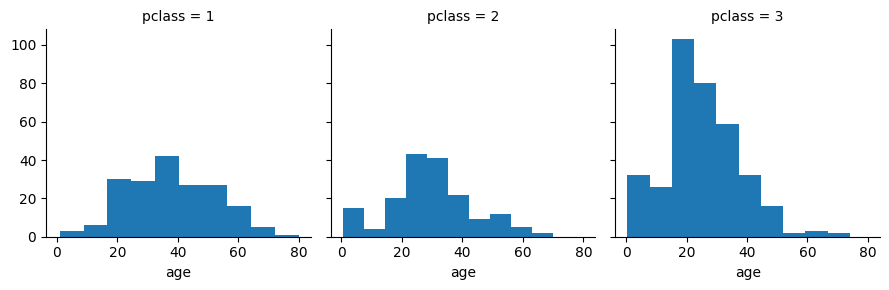

In [12]:
g = sns.FacetGrid(df, col="pclass")
g = g.map(plt.hist, "age")

## NaNs

In [13]:
def missing_value (df):
    missing_Number = df.isnull().sum().sort_values(ascending=False)[df.isnull().sum().sort_values(ascending=False) !=0]
    missing_percent=round((df.isnull().sum()/df.isnull().count())*100,2)[round((df.isnull().sum()/df.isnull().count())*100,2) !=0]
    missing = pd.concat([missing_Number,missing_percent],axis=1,keys=['Missing Number','Missing Percentage'])
    return missing

In [14]:
missing_value(df).style.background_gradient(cmap='coolwarm')

,Missing Number,Missing Percentage
deck,688,77.220000
age,177,19.870000
embark_town,2,0.220000
embarked,2,0.220000


In [15]:
# fill missing values
df["age"] = df["age"].fillna(df["age"].mean())
df["fare"] = df["fare"].fillna(df["fare"].mean())
df['embarked'] = df['embarked'].fillna(method='bfill')

In [16]:
# drop deck
df.drop(columns=["deck"], inplace=True)

In [17]:
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,died
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,0


## Student Performance
**EDA здорового человека**

[link](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams)

Датасет содержит 1000 примеров с данными о студентах и том, как они сдали экзамены.

**Description from Kaggle:**</br>
This data set consists of the marks secured by the students in various subjects.

**Колонки:**</br>
`gender [str|categorical]` - пол студента (male, female)</br>
`race_ethnicity [str|categorical]` - рассовая группа (A-E)</br>
`parental_level_of_education [str|categorical]` - уровень образования родителей</br>
`lunch [str|categorical]` - тип обеда (standard, free/reduced)</br>
`test_preparation_course [str|categorical]` - прошел ли подготовку к курсу</br>
`math\reading\writing_score [int]` - оценка за экзамен

In [18]:
# read data
df = pd.read_csv('../data/study_performance.csv')
print(df.shape)
df.head()

(1000, 8)


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [19]:
# у нас нет пропусков в данных, можем их не обрабатывать
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [20]:
# Распределение оценок выглядит нормально, баллы у студентов от 0 до 100
# по всем предметам статистики оценок близки друг к другу
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


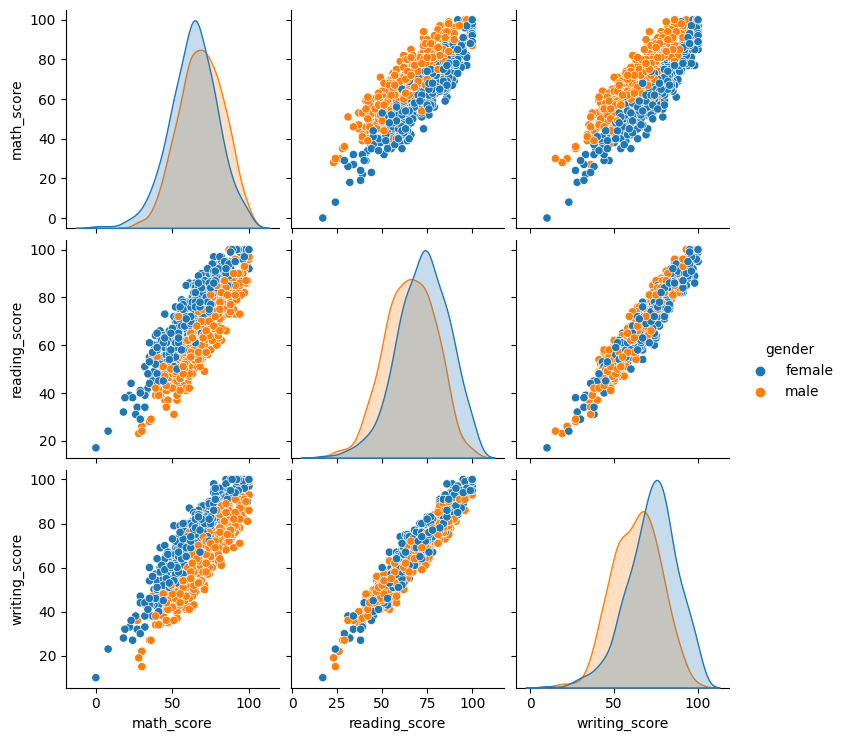

In [21]:
# distribution by gender
sns.pairplot(df,hue = 'gender')
plt.show()

У нас есть сильная зависимость между тем как студент сдает один предмет и тем, как он сдает другой. При этом у нас есть зависимость от пола и оценки по тому или иному предмету.

In [22]:
# add total_score and average_score 
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = df['total_score']/3

In [23]:
# average _score by gender
pd.pivot_table(data=df, values=["average_score", "math_score", "reading_score", "writing_score"],
               index="gender", aggfunc='mean').round(1)

,average_score,math_score,reading_score,writing_score
gender,,,,
female,69.6,63.6,72.6,72.5
male,65.8,68.7,65.5,63.3


В среднем мальчики учатся хуже девочек, но при этом лучше сдают математику.

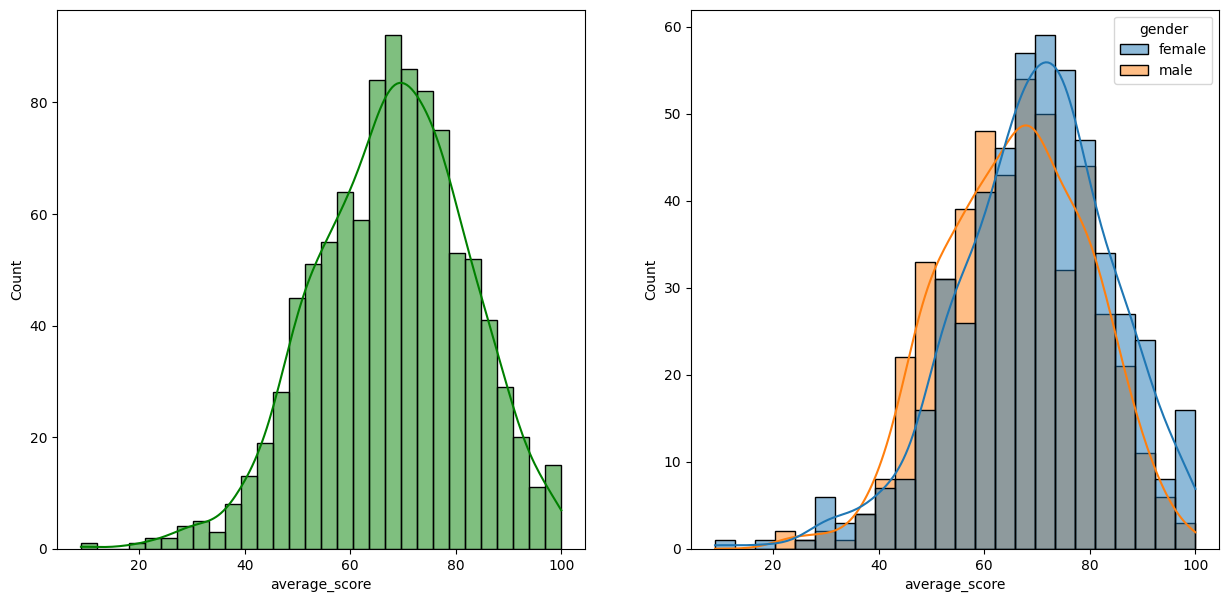

In [24]:
# Посмотрим на то, как распределен average_score в зависимости от пола
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average_score',kde=True,hue='gender')
plt.show()

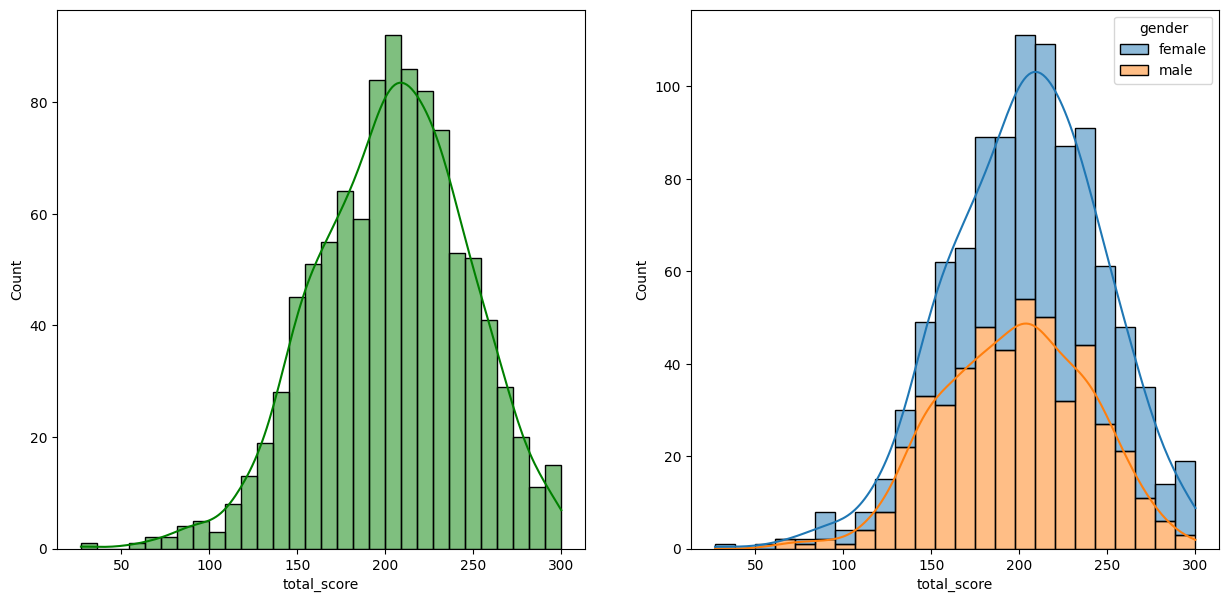

In [25]:
# Посмотрим на то, как распределен total_score в зависимости от пола (а нам оно надо???)
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender', multiple="stack")
plt.show()

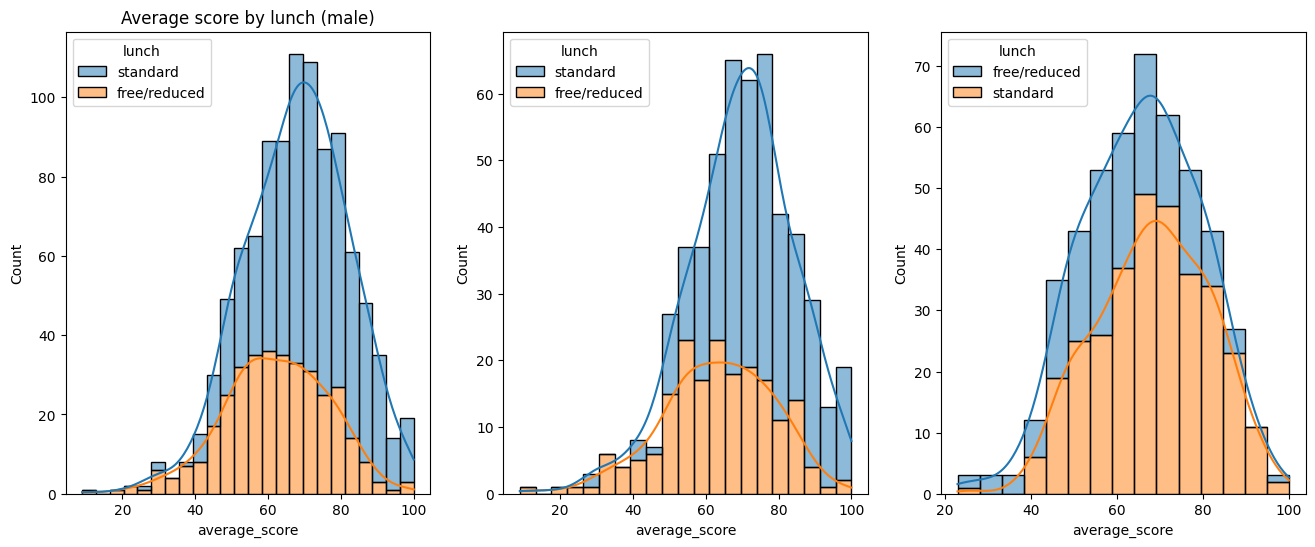

In [26]:
# Посмотрим на распреление lunch в зависимости от среднего скора и пола
fig, ax = plt.subplots(1,3,figsize=(16,6))

sns.histplot(data=df,x='average_score',kde=True,hue='lunch', ax=ax[0], multiple="stack")
ax[0].set_title("Average score by lunch")

sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='lunch', ax=ax[1], multiple="stack")
ax[0].set_title("Average score by lunch (female)")

sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='lunch', ax=ax[2], multiple="stack")
ax[0].set_title("Average score by lunch (male)")

plt.show()

In [27]:
# посмотрим на средний скор в зависимости от пола и ланча
pd.pivot_table(data=df, values=["average_score"], columns="lunch",
               index="gender", aggfunc='mean').round(1)

average_score         
lunch   free/reduced standard
gender                       
female          63.2     73.2
male            61.0     68.4

Мы видим, что те студенты, у которых был стандартный обед, имеют скор в среднем больше. Возможно, обед платный и те семьи, которые могут его оплатить, могут потратить больше денег на образование.

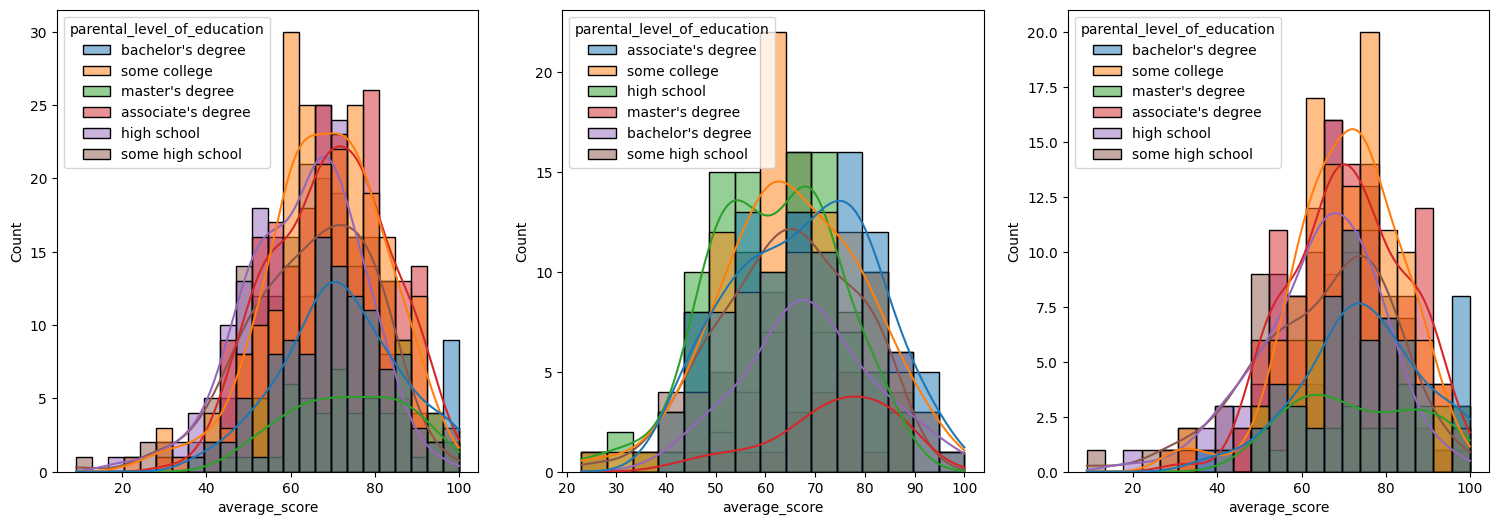

In [28]:
# посмотрим на то, как распределяется средний скор в зависимости от уровня образования родителей
# НИЧЕ НЕ ПОНЯТНО
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='parental_level_of_education')
plt.show()

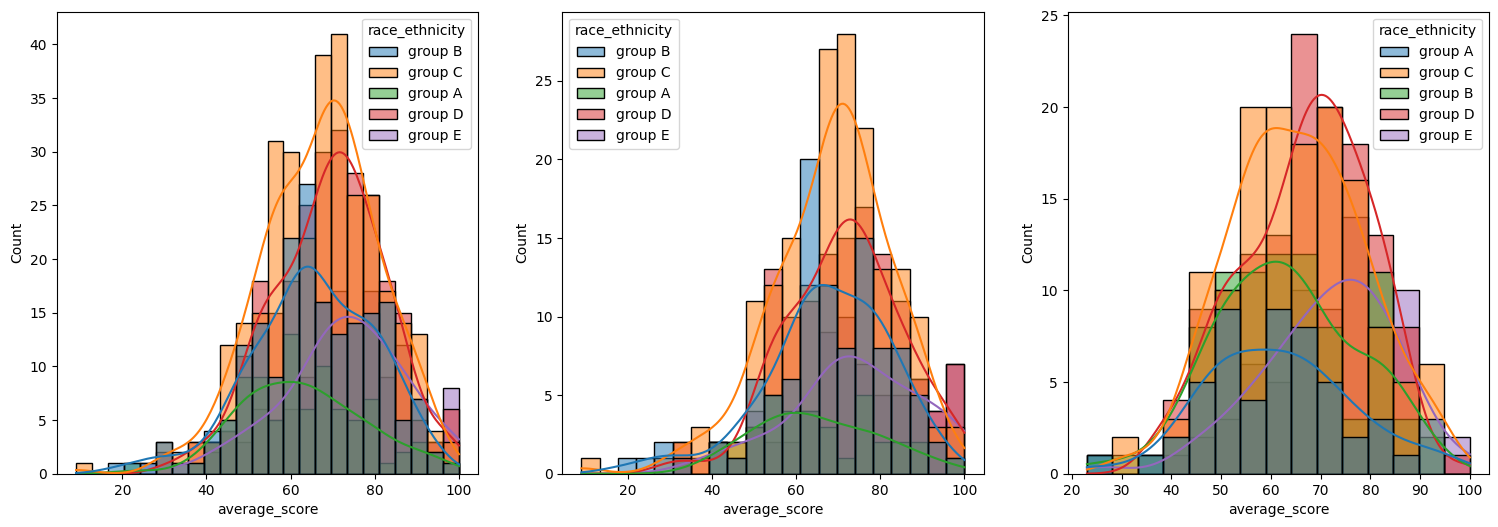

In [29]:
# Опять ничего непонятно :(
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='race_ethnicity')
plt.show()

In [30]:
# КАКОЙ ГРАФИК ЗДЕСЬ БУДЕТ ЛУЧШЕ???

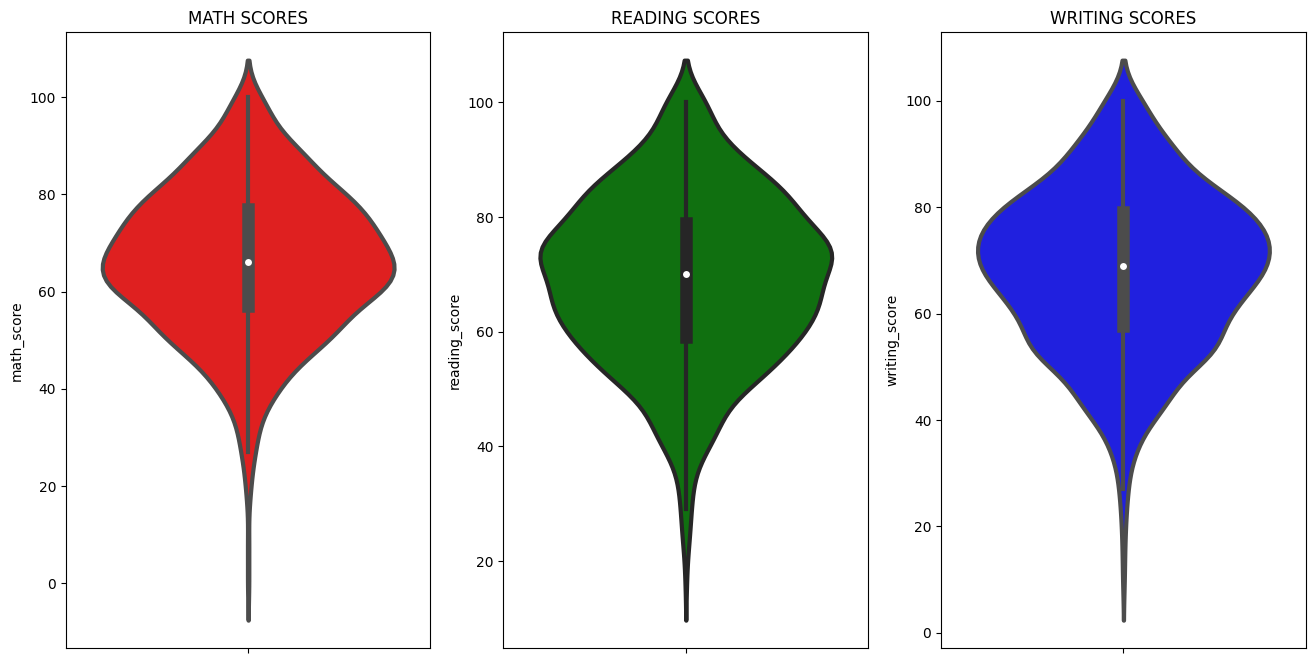

In [31]:
# Распределение скоров по различным предметам
fig, ax = plt.subplots(1,3, figsize=(16,8))

sns.violinplot(y='math_score',data=df,color='red',linewidth=3, ax=ax[0])
ax[0].set_title('MATH SCORES')

sns.violinplot(y='reading_score',data=df,color='green',linewidth=3, ax=ax[1])
ax[1].set_title('READING SCORES')

sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3, ax=ax[2])
ax[2].set_title('WRITING SCORES')

plt.show()

Распределение оценок выглядит как нормальное распределение, смещенное вправо.